In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('mode.use_inf_as_na', True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competition/Train_data.csv
/kaggle/input/competition/Validation.csv


/tmp/ipykernel_33/2898808872.py:7: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [2]:
df_train = pd.read_csv('/kaggle/input/competition/Train_data.csv')
df_train.head(10)

ID  galactic year                          galaxy  \
0  10065        1002001                        Antlia B   
1  10087         999000     KKH 11 (ZOAG G135.74-04.53)   
2  10141         993012                    Leo IV Dwarf   
3  10168         995006                         NGC 185   
4  10201         996004                          Grus I   
5  10226        1000000  Leo I Dwarf (DDO 74, UGC 5470)   
6  10238         991020                       BoÃ¶tes I   
7  10251         992016              UGC 7577 (DDO 125)   
8  10329         991020                          KKh 98   
9  10368         998001         Fornax Dwarf (E356-G04)   

   existence expectancy index  existence expectancy at birth  \
0                    0.624015                      56.397241   
1                    0.970048                      80.924094   
2                    0.995540                      82.441006   
3                    1.004362                      75.635986   
4                    1.050627                      83.412540   
5                    0.701613                      59.393718   
6                    0.747319                      70.225157   
7                    0.884287                      73.155912   
8                    0.888770                      78.569922   
9                    1.001783                      83.250960   

   Gross income per capita  Income Index  \
0              17649.87156      0.458599   
1              11409.94296      0.757218   
2              58774.29343      1.032429   
3              34960.41911      0.707776   
4              17073.45121      0.951402   
5              21345.68138      0.534916   
6              23051.71374      0.795094   
7              34042.13768      0.909842   
8              21461.46920      0.698224   
9              42759.83048      0.957864   

   Expected years of education (galactic years)  \
0                                      7.857841   
1                                     15.869798   
2                                     17.545117   
3                                     13.578086   
4                                     13.518157   
5                                      9.167112   
6                                     14.139791   
7                                     17.008380   
8                                     14.713173   
9                                     15.096444   

   Mean years of education (galactic years)  \
0                                  5.196527   
1                                 13.065734   
2                                 11.399711   
3                                       NaN   
4                                 11.749071   
5                                  5.942806   
6                                  7.887241   
7                                 12.075169   
8                                  8.888172   
9                                 12.926932   

   Intergalactic Development Index (IDI)  ...  \
0                               0.507534  ...   
1                               0.807108  ...   
2                               0.973684  ...   
3                                    NaN  ...   
4                               0.965452  ...   
5                               0.321638  ...   
6                               0.668650  ...   
7                               0.842762  ...   
8                               0.702012  ...   
9                               1.051782  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                       0.458973   
6                                            NaN   
7                                            NaN   
8                                            NaN   
9                         

In [3]:
df_test = pd.read_csv('/kaggle/input/competition/Validation.csv')
df_test.head(10)

ID  galactic year                  galaxy  existence expectancy index  \
0  886447        1004004  Andromeda Galaxy (M31)                    0.803915   
1  687564        1005006  Andromeda Galaxy (M31)                    0.860011   
2  494935        1006009  Andromeda Galaxy (M31)                    0.810644   
3  378919        1015056  Andromeda Galaxy (M31)                    0.837170   
4  421878        1004004             Andromeda I                    0.749034   
5  949719        1005006             Andromeda I                    0.780314   
6  898972        1006009             Andromeda I                    0.831231   
7  375574        1015056             Andromeda I                    0.930855   
8  569844        1011030            Andromeda II                    1.098514   
9  654472        1012036            Andromeda II                    1.070749   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      82.718434              17299.57148      0.691448   
1                      73.682279              24971.71631      0.669550   
2                      68.456526              15943.82977      0.766118   
3                      68.742404              20952.63665      0.757196   
4                      72.093220              30068.14043      0.641228   
5                      73.260852              25518.34111      0.671947   
6                      69.147214              22288.24338      0.668888   
7                      76.370616              20793.51589      0.786066   
8                      88.471310              45907.88815      1.000711   
9                      87.149509              30312.89463      1.043580   

   Expected years of education (galactic years)  \
0                                     16.083635   
1                                     12.858577   
2                                     14.236676   
3                                     14.281498   
4                                     12.510524   
5                                     12.523339   
6                                     12.192083   
7                                     15.177870   
8                                     21.368570   
9                                     20.890412   

   Mean years of education (galactic years)  \
0                                 11.282011   
1                                 10.493260   
2                                  9.962169   
3                                 10.329880   
4                                  7.132999   
5                                  7.038226   
6                                  7.568960   
7                                  6.669020   
8                                 13.781150   
9                                 12.632184   

   Intergalactic Development Index (IDI)  ...  \
0                               0.715746  ...   
1                               0.727915  ...   
2                               0.757072  ...   
3                               0.759207  ...   
4                               0.673619  ...   
5                               0.707992  ...   
6                               0.698053  ...   
7                               0.688784  ...   
8                               1.005822  ...   
9                               1.022990  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                       0.655410   
6                                            NaN   
7                                       0.669321   
8                                       0.920078   
9                                       1.053932   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1      

In [4]:
df_train.isnull().sum()

ID                                                                              0
galactic year                                                                   0
galaxy                                                                          0
existence expectancy index                                                      1
existence expectancy at birth                                                   1
                                                                             ... 
Adjusted net savings                                                         2654
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    2581
Private galaxy capital flows (% of GGP)                                      2718
Gender Inequality Index (GII)                                                2740
Well-Being Index                                                                0
Length: 81, dtype: int64

In [5]:
df_train.head(10)

ID  galactic year                          galaxy  \
0  10065        1002001                        Antlia B   
1  10087         999000     KKH 11 (ZOAG G135.74-04.53)   
2  10141         993012                    Leo IV Dwarf   
3  10168         995006                         NGC 185   
4  10201         996004                          Grus I   
5  10226        1000000  Leo I Dwarf (DDO 74, UGC 5470)   
6  10238         991020                       BoÃ¶tes I   
7  10251         992016              UGC 7577 (DDO 125)   
8  10329         991020                          KKh 98   
9  10368         998001         Fornax Dwarf (E356-G04)   

   existence expectancy index  existence expectancy at birth  \
0                    0.624015                      56.397241   
1                    0.970048                      80.924094   
2                    0.995540                      82.441006   
3                    1.004362                      75.635986   
4                    1.050627                      83.412540   
5                    0.701613                      59.393718   
6                    0.747319                      70.225157   
7                    0.884287                      73.155912   
8                    0.888770                      78.569922   
9                    1.001783                      83.250960   

   Gross income per capita  Income Index  \
0              17649.87156      0.458599   
1              11409.94296      0.757218   
2              58774.29343      1.032429   
3              34960.41911      0.707776   
4              17073.45121      0.951402   
5              21345.68138      0.534916   
6              23051.71374      0.795094   
7              34042.13768      0.909842   
8              21461.46920      0.698224   
9              42759.83048      0.957864   

   Expected years of education (galactic years)  \
0                                      7.857841   
1                                     15.869798   
2                                     17.545117   
3                                     13.578086   
4                                     13.518157   
5                                      9.167112   
6                                     14.139791   
7                                     17.008380   
8                                     14.713173   
9                                     15.096444   

   Mean years of education (galactic years)  \
0                                  5.196527   
1                                 13.065734   
2                                 11.399711   
3                                       NaN   
4                                 11.749071   
5                                  5.942806   
6                                  7.887241   
7                                 12.075169   
8                                  8.888172   
9                                 12.926932   

   Intergalactic Development Index (IDI)  ...  \
0                               0.507534  ...   
1                               0.807108  ...   
2                               0.973684  ...   
3                                    NaN  ...   
4                               0.965452  ...   
5                               0.321638  ...   
6                               0.668650  ...   
7                               0.842762  ...   
8                               0.702012  ...   
9                               1.051782  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                       0.458973   
6                                            NaN   
7                                            NaN   
8                                            NaN   
9                         

In [6]:
df_test.head(10)

ID  galactic year                  galaxy  existence expectancy index  \
0  886447        1004004  Andromeda Galaxy (M31)                    0.803915   
1  687564        1005006  Andromeda Galaxy (M31)                    0.860011   
2  494935        1006009  Andromeda Galaxy (M31)                    0.810644   
3  378919        1015056  Andromeda Galaxy (M31)                    0.837170   
4  421878        1004004             Andromeda I                    0.749034   
5  949719        1005006             Andromeda I                    0.780314   
6  898972        1006009             Andromeda I                    0.831231   
7  375574        1015056             Andromeda I                    0.930855   
8  569844        1011030            Andromeda II                    1.098514   
9  654472        1012036            Andromeda II                    1.070749   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      82.718434              17299.57148      0.691448   
1                      73.682279              24971.71631      0.669550   
2                      68.456526              15943.82977      0.766118   
3                      68.742404              20952.63665      0.757196   
4                      72.093220              30068.14043      0.641228   
5                      73.260852              25518.34111      0.671947   
6                      69.147214              22288.24338      0.668888   
7                      76.370616              20793.51589      0.786066   
8                      88.471310              45907.88815      1.000711   
9                      87.149509              30312.89463      1.043580   

   Expected years of education (galactic years)  \
0                                     16.083635   
1                                     12.858577   
2                                     14.236676   
3                                     14.281498   
4                                     12.510524   
5                                     12.523339   
6                                     12.192083   
7                                     15.177870   
8                                     21.368570   
9                                     20.890412   

   Mean years of education (galactic years)  \
0                                 11.282011   
1                                 10.493260   
2                                  9.962169   
3                                 10.329880   
4                                  7.132999   
5                                  7.038226   
6                                  7.568960   
7                                  6.669020   
8                                 13.781150   
9                                 12.632184   

   Intergalactic Development Index (IDI)  ...  \
0                               0.715746  ...   
1                               0.727915  ...   
2                               0.757072  ...   
3                               0.759207  ...   
4                               0.673619  ...   
5                               0.707992  ...   
6                               0.698053  ...   
7                               0.688784  ...   
8                               1.005822  ...   
9                               1.022990  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                       0.655410   
6                                            NaN   
7                                       0.669321   
8                                       0.920078   
9                                       1.053932   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1      

# EDA

In [7]:
df_test.isnull().sum()

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                         255
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    301
Private galaxy capital flows (% of GGP)                                      230
Gender Inequality Index (GII)                                                239
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64

In [8]:
null_columns = df_train.columns[df_train.isnull().any()]
null_columns

Index(['existence expectancy index', 'existence expectancy at birth',
       'Gross income per capita', 'Income Index',
       'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (ga

In [9]:
for column in null_columns:
    mean_value = df_train[column].mean()
    df_train[column] = df_train[column].fillna(mean_value)

In [10]:
print(df_train.isnull().sum())

ID                                                                           0
galactic year                                                                0
galaxy                                                                       0
existence expectancy index                                                   0
existence expectancy at birth                                                0
                                                                            ..
Adjusted net savings                                                         0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    0
Private galaxy capital flows (% of GGP)                                      0
Gender Inequality Index (GII)                                                0
Well-Being Index                                                             0
Length: 81, dtype: int64


In [11]:
for column in null_columns:
    mean_value = df_test[column].mean()
    df_test[column] = df_test[column].fillna(mean_value)

In [12]:
print(df_test.isnull().sum())

ID                                                                             0
galactic year                                                                  0
galaxy                                                                         0
existence expectancy index                                                     0
existence expectancy at birth                                                  0
                                                                            ... 
Adjusted net savings                                                           0
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total      0
Private galaxy capital flows (% of GGP)                                        0
Gender Inequality Index (GII)                                                  0
Predicted Well-Being Index                                                   720
Length: 81, dtype: int64


In [13]:
null_col_test = df_test.columns[df_test.isnull().any()]
null_col_test

Index(['Predicted Well-Being Index'], dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


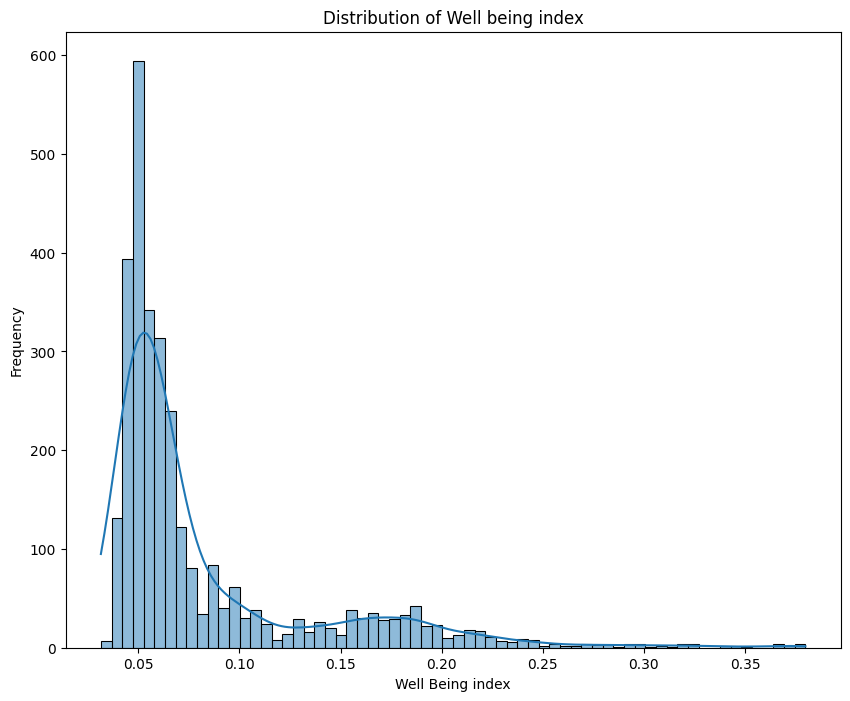

In [56]:
# Visualizing the distribution of well being index
plt.figure(figsize=(10, 8))
sns.histplot(df_train["Well-Being Index"], kde=True)
plt.title("Distribution of Well being index")
plt.xlabel("Well Being index")
plt.ylabel("Frequency")
plt.show()

In [14]:
df_test.drop(df_test.index[-1],inplace=True)

In [15]:
col_test = df_test.columns[df_test.isnull().any()]
col_test

Index(['Predicted Well-Being Index'], dtype='object')

# Selection

In [16]:
X_train = df_train.drop(['ID','Well-Being Index', 'galaxy'], axis=1)
X_train.shape

(3097, 78)

In [17]:
y_train = df_train['Well-Being Index']
y_train.shape

(3097,)

# Model Selection and Evaluation

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
model = LinearRegression().fit(X_train,y_train)
predict = model.predict(X_train)
mae = mean_absolute_error(predict,y_train)
mse = mean_squared_error(predict,y_train)
print('MAE :',mae)
print('MSE :',mse)

MAE : 0.024982560174917335
MSE : 0.0012586640791116953


<Axes: >

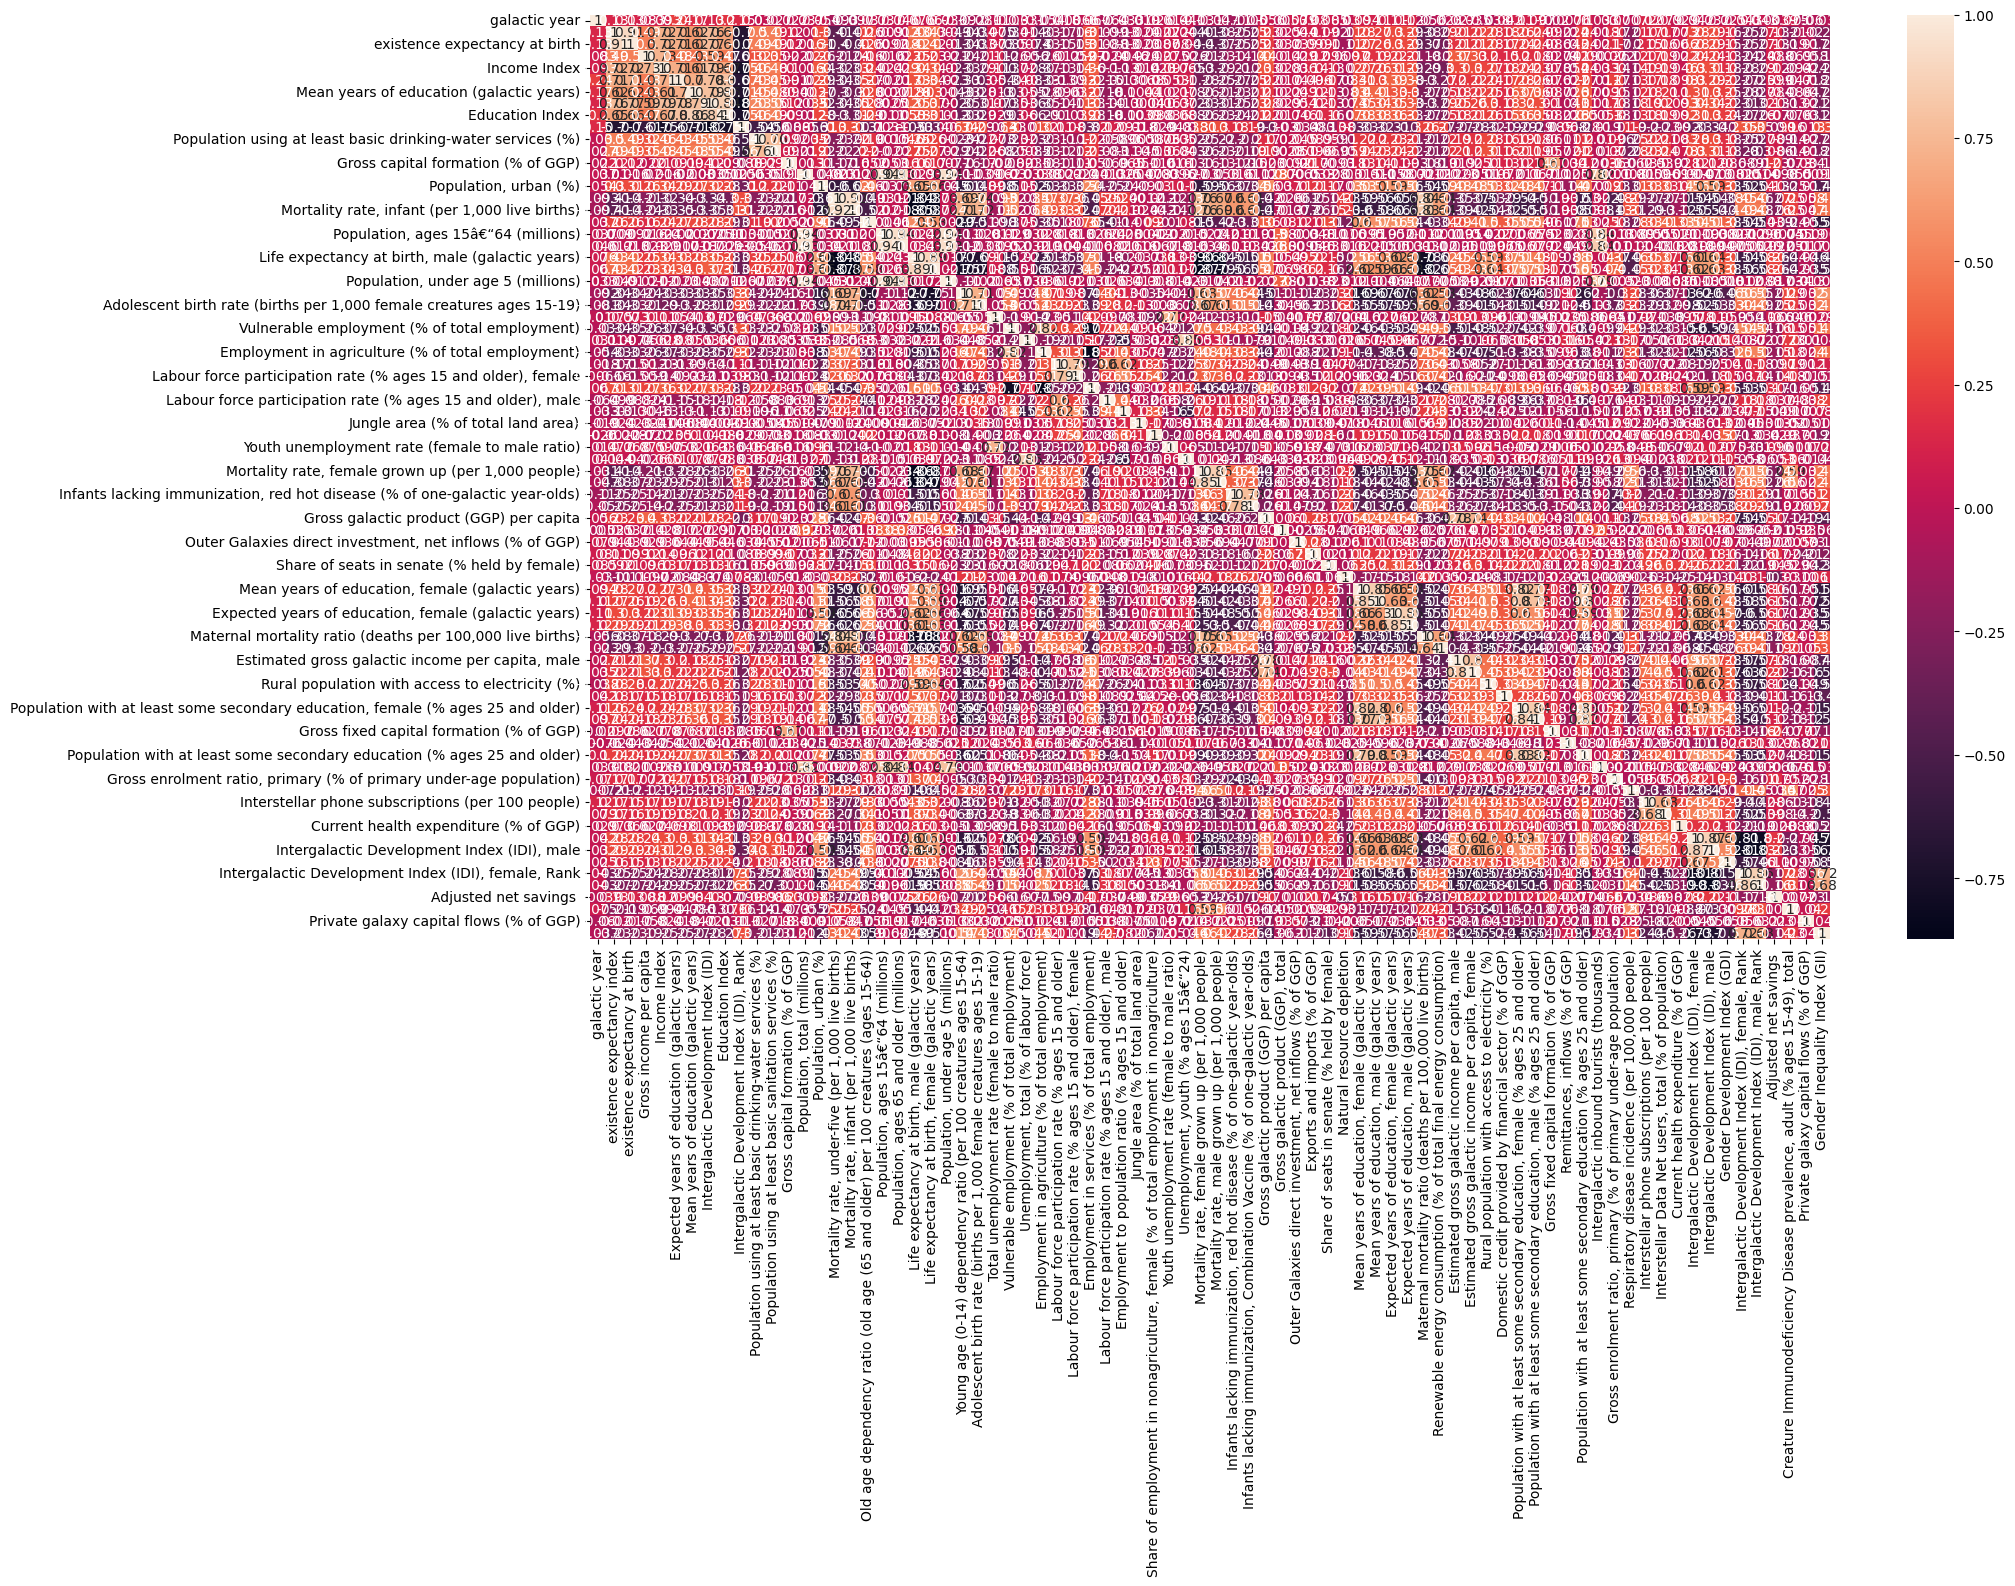

In [20]:
plt.figure(figsize=(20,12))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [24]:
X_test = df_train.drop(['ID','Well-Being Index', 'galaxy'], axis=1)
X_test.shape

(3097, 78)

In [25]:
y_test = df_train['Well-Being Index']
y_test.shape

(3097,)

In [26]:
model = LinearRegression().fit(X_test,y_test)
predict = model.predict(X_test)
mae = mean_absolute_error(predict,y_test)
print('MAE :',mae)
r_square = np.sqrt(mae)
print('RMSE :',r_square)

MAE : 0.024982560174917335
RMSE : 0.15805872381781821


<Axes: >

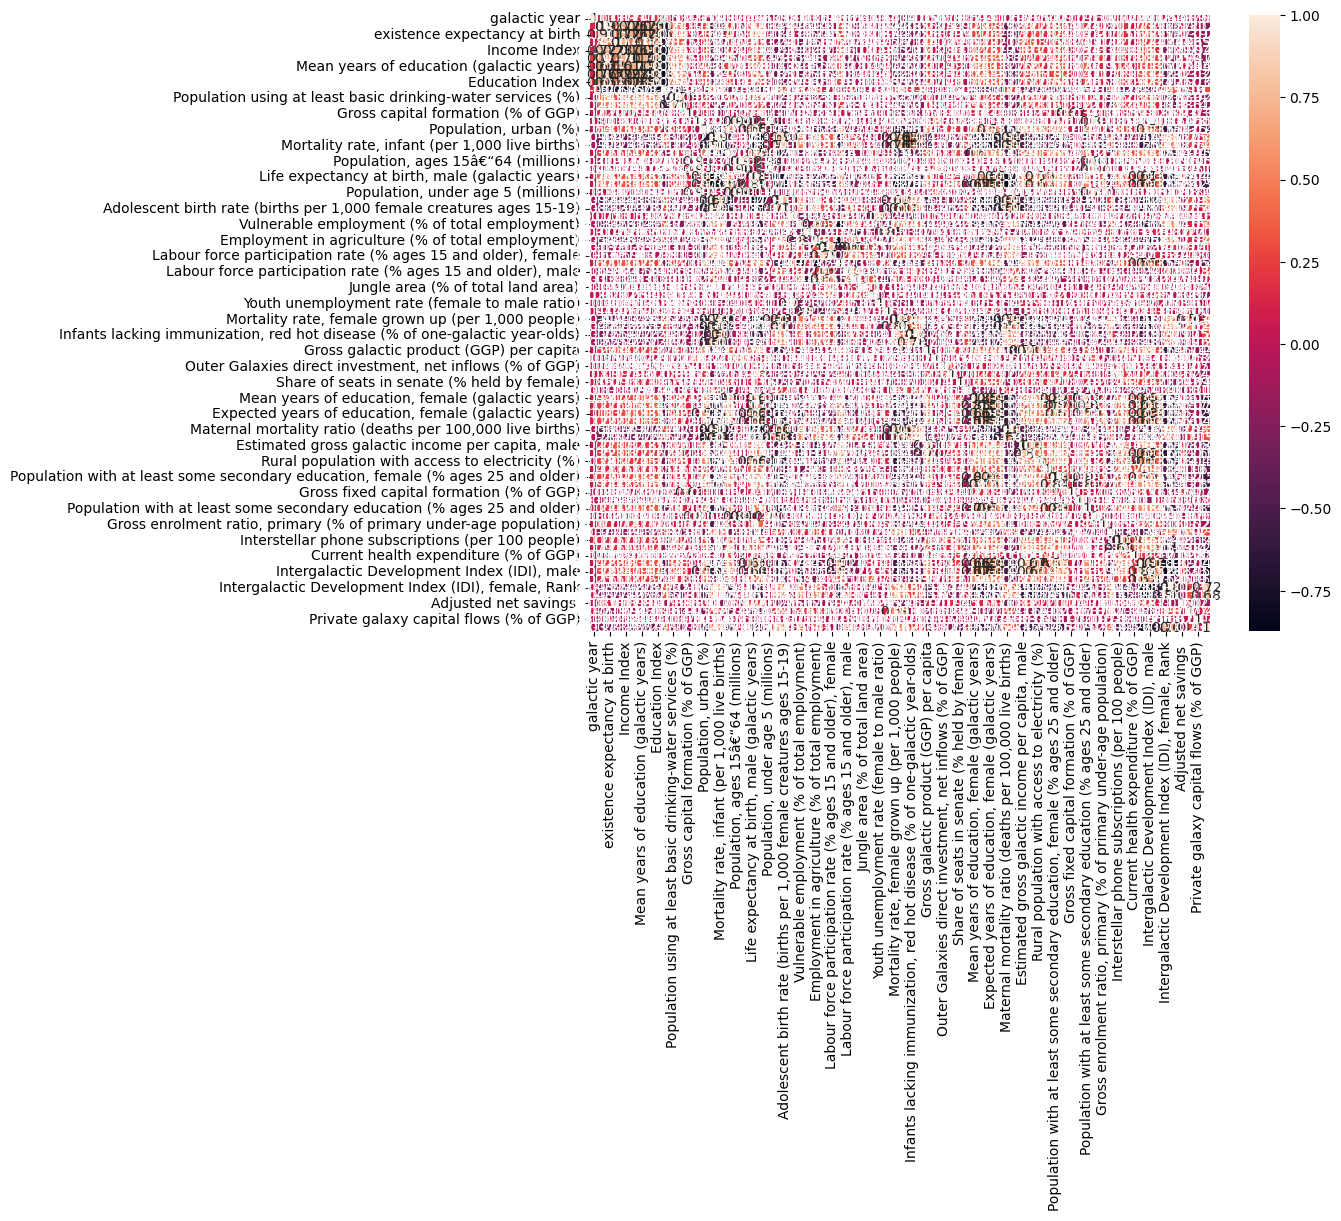

In [27]:
plt.figure(figsize=(10,8))
corr = X_test.corr()
sns.heatmap(corr,annot = True)

# Selection of Important Features

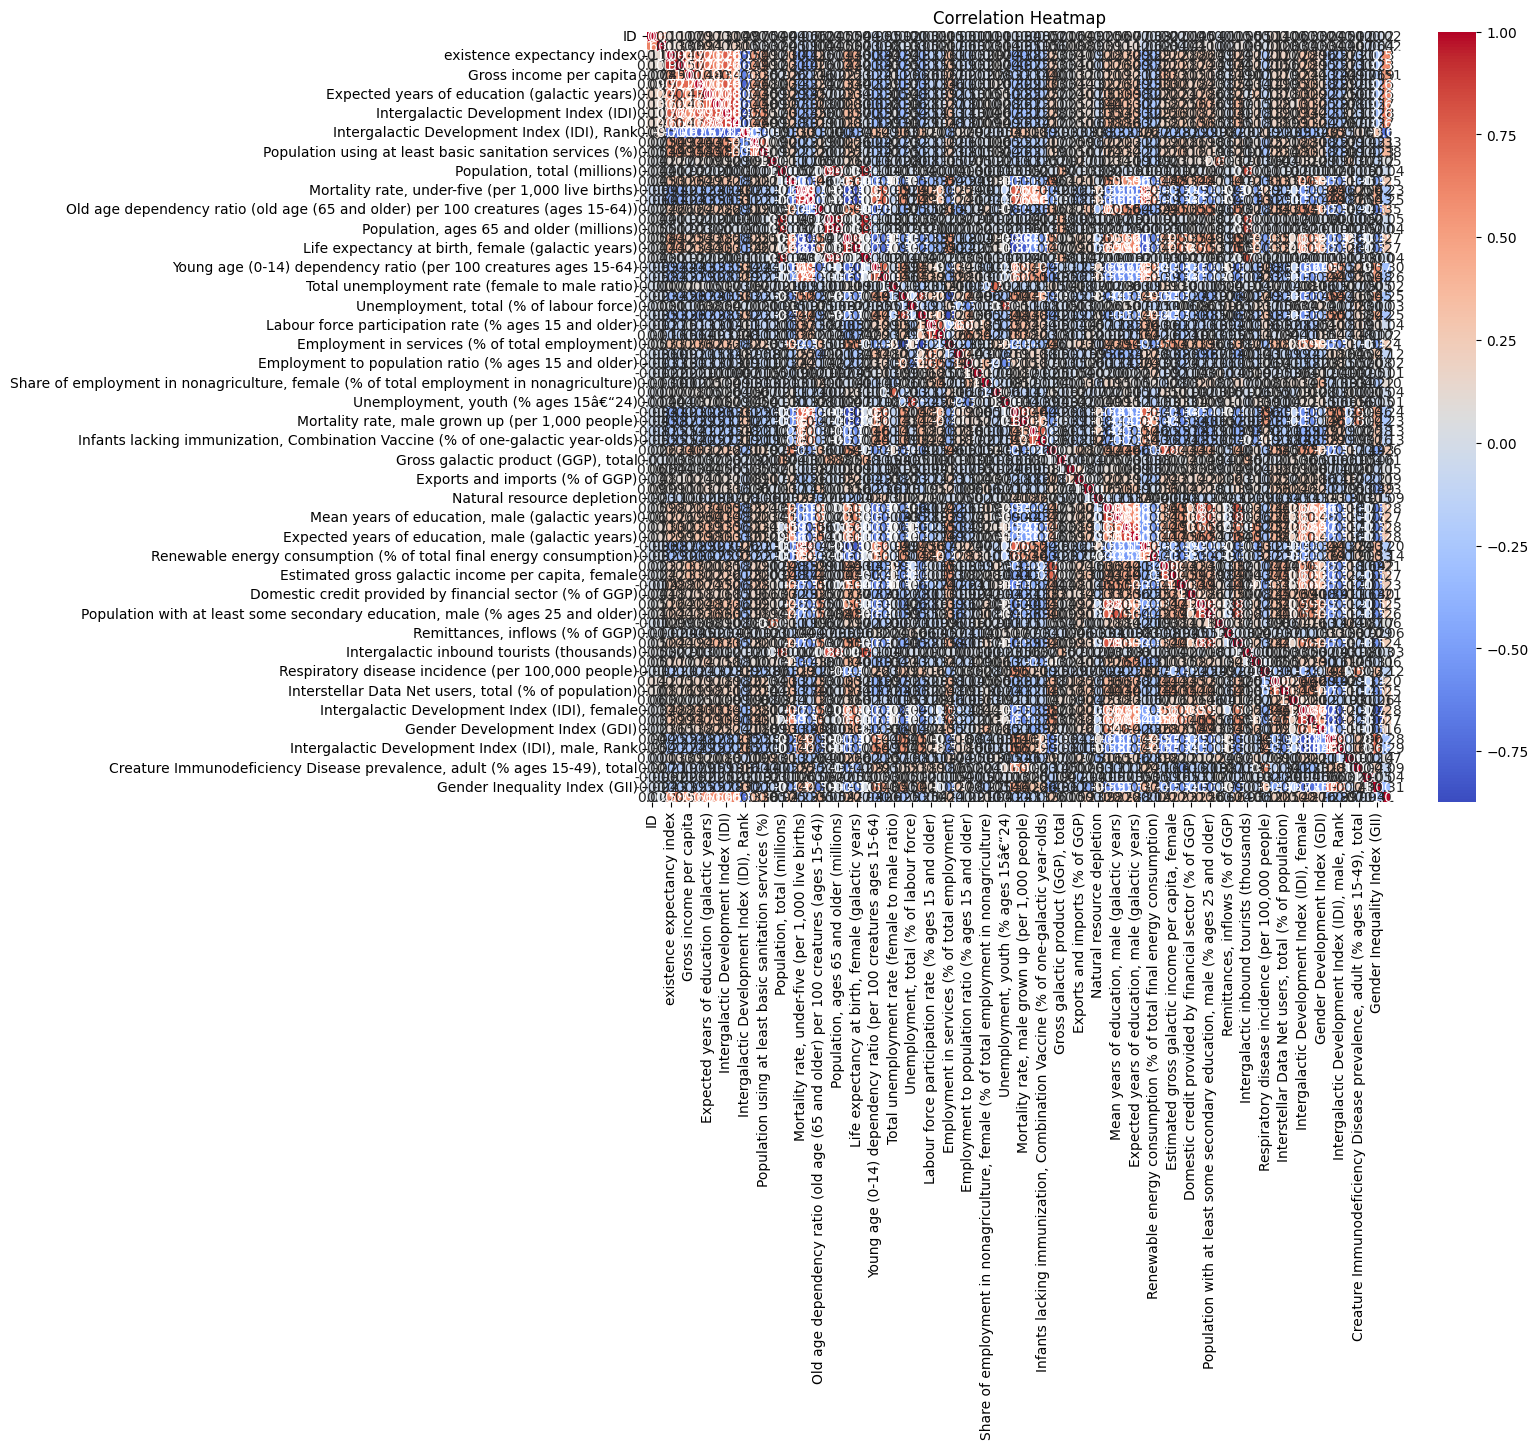

Selected features in ascending order of correlation with the Well-Being Index:
Well-Being Index                                                    1.000000
Intergalactic Development Index (IDI)                               0.650376
Education Index                                                     0.634305
Expected years of education (galactic years)                        0.607690
Income Index                                                        0.605611
                                                                      ...   
Intergalactic Development Index (IDI), female, Rank                -0.277794
Intergalactic Development Index (IDI), male, Rank                  -0.285742
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)   -0.298642
Gender Inequality Index (GII)                                      -0.311455
Intergalactic Development Index (IDI), Rank                        -0.691855
Name: Well-Being Index, Length: 80, dtype: float64


In [53]:
rm = df_train.corr(numeric_only=True)

# Visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(rm, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Select features with high correlation to the well-being index
# Sort features based on their correlation with the well-being index in ascending order
selected_features = rm['Well-Being Index'].sort_values(ascending=False)

print("Selected features in ascending order of correlation with the Well-Being Index:")
print(selected_features)

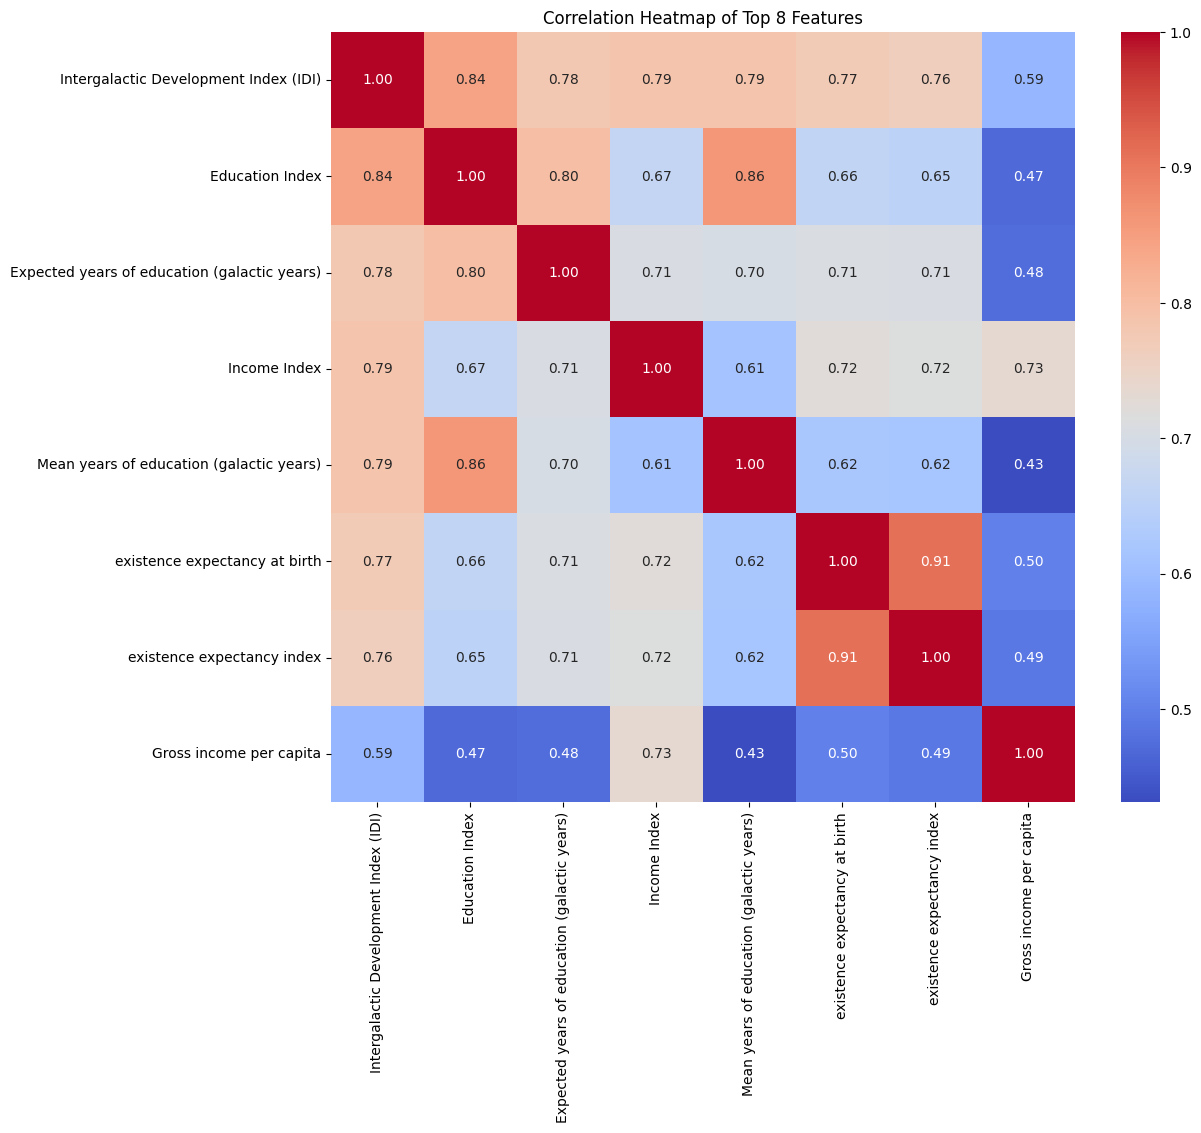

In [77]:
# Select top 8 features correlated with the Well-Being Index
top_8_features = selected_features.index[1:9]  # Exclude Well-Being Index itself

# Calculate correlation matrix of top 8 features
top_8_corr_matrix = df_train[top_8_features].corr()

# Visualize the correlation matrix of top 8 features
plt.figure(figsize=(12, 10))
sns.heatmap(top_8_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 8 Features')
plt.show()

In [81]:
print("Length of top_8_features:", len(top_8_features))
print("Length of feature_importance:", len(feature_importance))

Length of top_8_features: 8
Length of feature_importance: 78


In [ ]:
# Assuming top_8_features and feature_importance are your arrays
# Ensure both arrays have the same length
assert len(top_8_features) == len(feature_importance), "Arrays must be of the same length"

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': top_8_features, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

In [30]:
corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i,j]>0.9:
            corr_pairs.append((corr.columns[i],corr.columns[j],corr.iloc[i,j]))
corr_pairs

[('existence expectancy at birth',
  'existence expectancy index',
  0.910614908516787),
 ('Mortality rate, infant (per 1,000 live births)',
  'Mortality rate, under-five (per 1,000 live births)',
  0.9221093132554745),
 ('Population, ages 15â€“64 (millions)',
  'Population, total (millions)',
  0.9412295575210206),
 ('Population, ages 65 and older (millions)',
  'Population, total (millions)',
  0.9327473850319695),
 ('Population, ages 65 and older (millions)',
  'Population, ages 15â€“64 (millions)',
  0.9359905063653026),
 ('Population, under age 5 (millions)',
  'Population, total (millions)',
  0.9383768733611253),
 ('Population, under age 5 (millions)',
  'Population, ages 15â€“64 (millions)',
  0.9404114342345553),
 ('Population, under age 5 (millions)',
  'Population, ages 65 and older (millions)',
  0.9312924551597582)]

In [78]:
# Get feature importance
feature_importance = model.coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': top_8_features, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

ValueError: All arrays must be of the same length

In [73]:
ID = df_test['ID']

In [ ]:

# Assuming ID and pred_train are your ID and predicted values, respectively
table_data = [["Actual Well-Being Index", "Predicted Well-Being Index"]]
for i in range(min(10, len(ID))): 
    table_data.append([ID[i], pred_train[i]])

print(tabulate(table_data, headers="firstrow", tablefmt="grid"))


# RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [32]:
Reg_model = RandomForestRegressor(n_estimators=10,max_depth=5).fit(X_train,y_train)
Pred_train = model.predict(X_train)
pred_train = model.predict(X_test)
mean_absolute_error(Pred_train,y_train),mean_absolute_error(pred_train,y_test)

(0.024982560174917335, 0.024982560174917335)

In [33]:
x_val,x_hold,y_val,y_hold = train_test_split(X_test,y_test,test_size=0.5)
x_val.shape,x_hold.shape,y_val.shape,y_hold.shape

((1548, 78), (1549, 78), (1548,), (1549,))

In [38]:
linear_val_predictions = model.predict(x_val)
mean_absolute_error(y_train,predict),mean_absolute_error(y_val,linear_val_predictions)


(0.024982560174917335, 0.025258653105496562)

In [39]:
reg_val_preds = Reg_model.predict(x_val)
mean_absolute_error(y_train,Pred_train),mean_absolute_error(y_val,reg_val_preds)

(0.024982560174917335, 0.013373163192197517)

In [40]:
Reg_model_preds = Reg_model.predict(x_hold)
mean_absolute_error(y_hold,Reg_model_preds)

0.012706056220131257

In [70]:
# Assuming ID and pred_train are your ID and predicted values, respectively
table_data = [["Actual Well-Being Index", "Predicted Well-Being Index"]]
for i in range(min(5, len(ID))):  
    table_data.append([ID[i], Reg_model_preds[i]])

print(tabulate(table_data, headers="firstrow", tablefmt="grid"))


+---------------------------+------------------------------+
|   Actual Well-Being Index |   Predicted Well-Being Index |
+===========================+==============================+
|                    886447 |                    0.0545305 |
+---------------------------+------------------------------+
|                    687564 |                    0.0649256 |
+---------------------------+------------------------------+
|                    494935 |                    0.0546283 |
+---------------------------+------------------------------+
|                    378919 |                    0.0734205 |
+---------------------------+------------------------------+
|                    421878 |                    0.049953  |
+---------------------------+------------------------------+
